In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt


In [4]:
# read all csv files on the folder
folder = 'datas_all'
files = ['datas_all/' + f for f in os.listdir(folder) if f.endswith('.csv')]
df = pd.DataFrame()
for file in files:
    df_temp = pd.read_csv(file)
    df = pd.concat([df, df_temp])


In [8]:
data=df

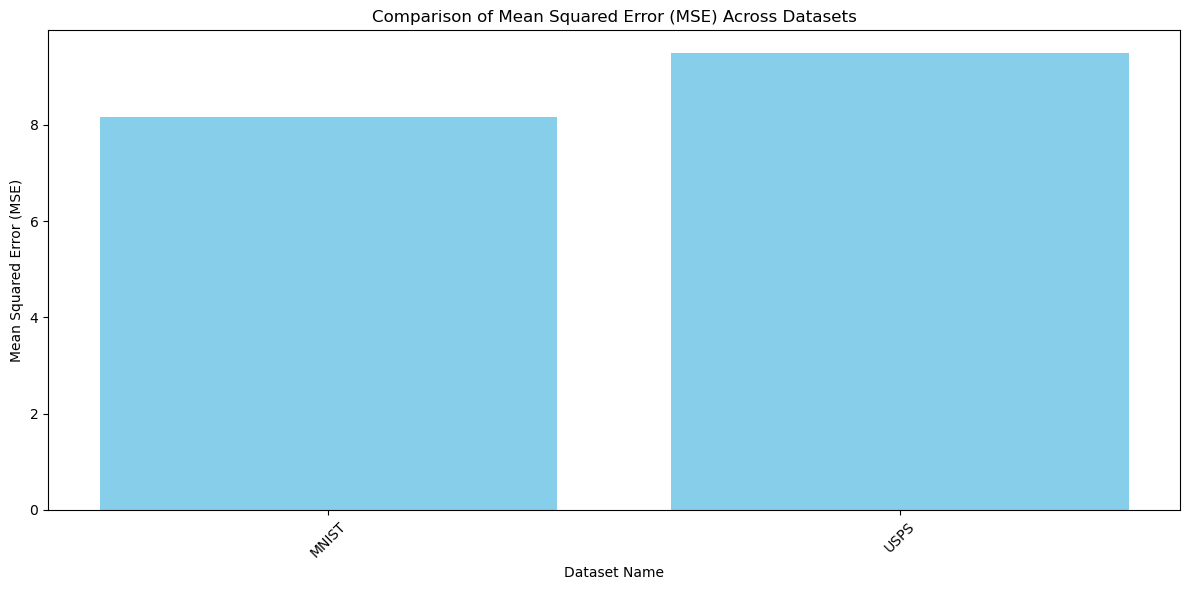

In [9]:

# Plotting the MSE for different datasets and configurations
fig, ax = plt.subplots(figsize=(12, 6))

# Grouping data by DatasetName and averaging the MSE for clarity in visualization
grouped_data = data.groupby('DatasetName')['MSE'].mean().reset_index()

# Bar plot for average MSE per dataset
ax.bar(grouped_data['DatasetName'], grouped_data['MSE'], color='skyblue')

# Setting labels and title
ax.set_xlabel('Dataset Name')
ax.set_ylabel('Mean Squared Error (MSE)')
ax.set_title('Comparison of Mean Squared Error (MSE) Across Datasets')

# Displaying the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


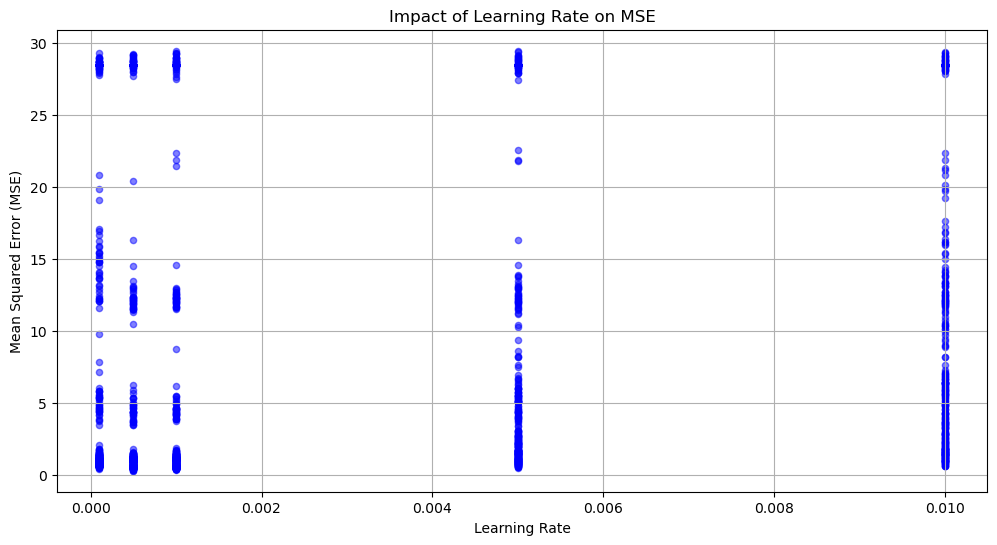

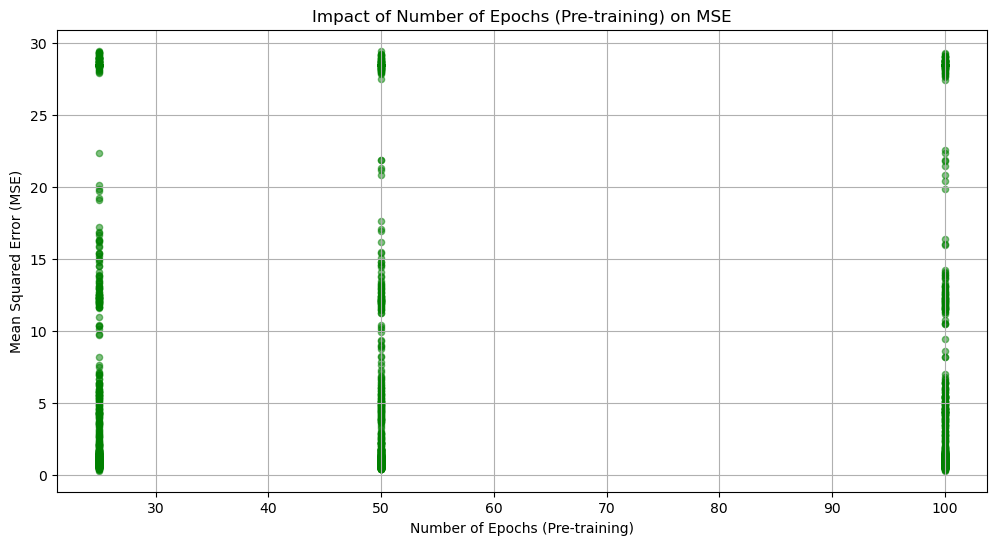

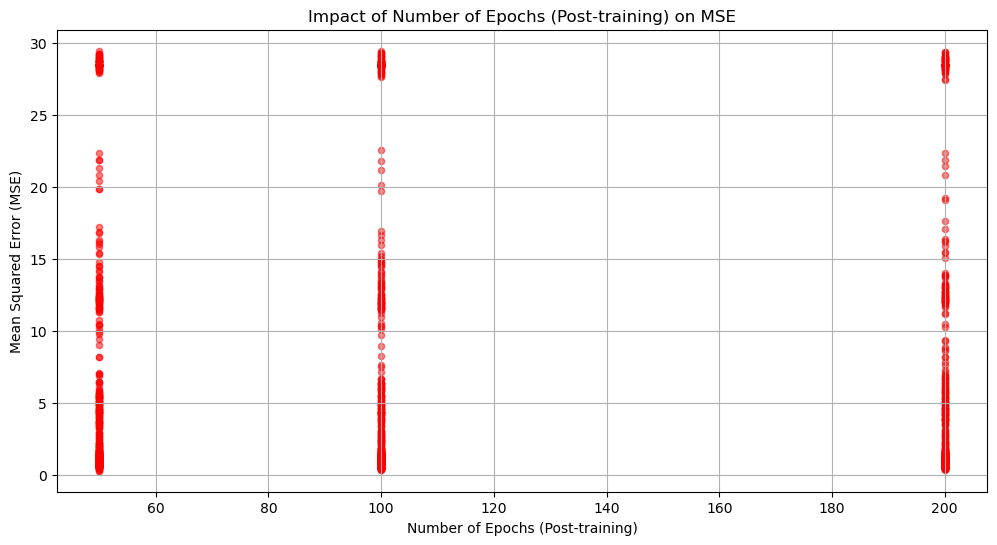

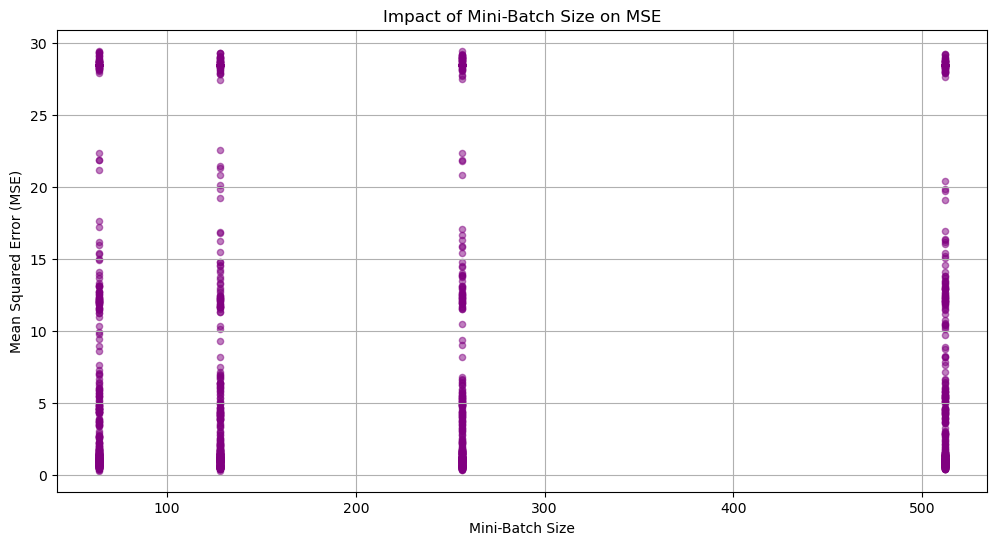

In [11]:
# Analyzing the impact of different hyperparameters on MSE

# Plotting the effect of learning rate on MSE
fig, ax = plt.subplots(figsize=(12, 6))
data.plot.scatter(x='learning_rate', y='MSE', ax=ax, color='blue', alpha=0.5)
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Mean Squared Error (MSE)')
ax.set_title('Impact of Learning Rate on MSE')
plt.grid(True)
plt.show()

# Plotting the effect of number of epochs (pre-training) on MSE
fig, ax = plt.subplots(figsize=(12, 6))
data.plot.scatter(x='num_epochs_pre', y='MSE', ax=ax, color='green', alpha=0.5)
ax.set_xlabel('Number of Epochs (Pre-training)')
ax.set_ylabel('Mean Squared Error (MSE)')
ax.set_title('Impact of Number of Epochs (Pre-training) on MSE')
plt.grid(True)
plt.show()

# Plotting the effect of number of epochs (post-training) on MSE
fig, ax = plt.subplots(figsize=(12, 6))
data.plot.scatter(x='num_epochs_post', y='MSE', ax=ax, color='red', alpha=0.5)
ax.set_xlabel('Number of Epochs (Post-training)')
ax.set_ylabel('Mean Squared Error (MSE)')
ax.set_title('Impact of Number of Epochs (Post-training) on MSE')
plt.grid(True)
plt.show()

# Plotting the effect of mini-batch size on MSE
fig, ax = plt.subplots(figsize=(12, 6))
data.plot.scatter(x='miniBatch_size', y='MSE', ax=ax, color='purple', alpha=0.5)
ax.set_xlabel('Mini-Batch Size')
ax.set_ylabel('Mean Squared Error (MSE)')
ax.set_title('Impact of Mini-Batch Size on MSE')
plt.grid(True)
plt.show()


C:\Users\aslab\AppData\Local\Temp\ipykernel_35736\541962757.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


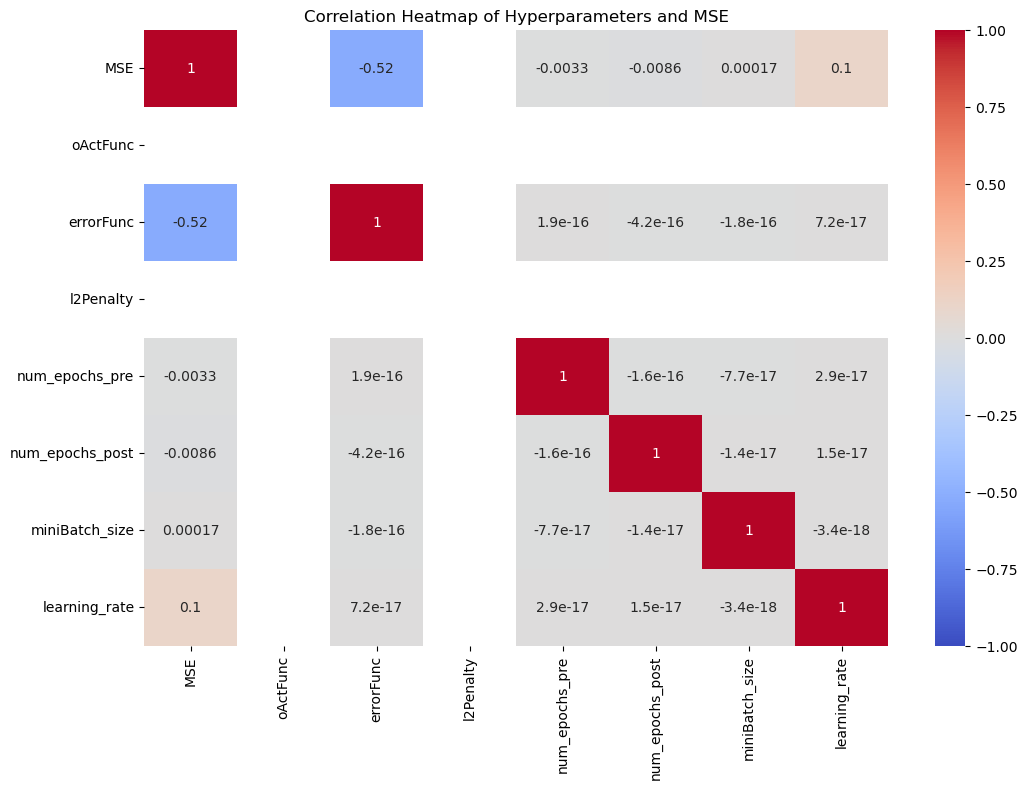

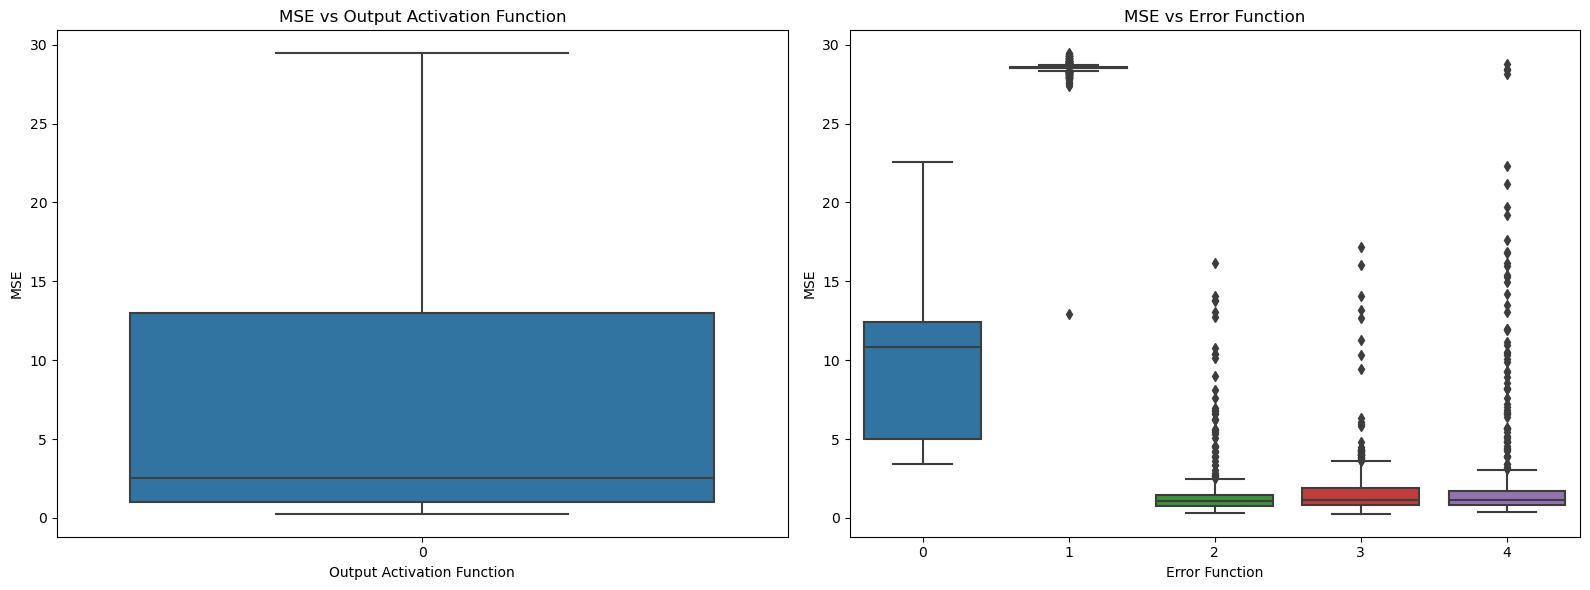

In [12]:
import seaborn as sns

# Converting relevant columns to numerical values if necessary
data['oActFunc'] = data['oActFunc'].astype('category').cat.codes
data['errorFunc'] = data['errorFunc'].astype('category').cat.codes

# Correlation heatmap
corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Hyperparameters and MSE')
plt.show()

# Boxplots for categorical variables
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(x='oActFunc', y='MSE', data=data, ax=axes[0])
axes[0].set_title('MSE vs Output Activation Function')
axes[0].set_xlabel('Output Activation Function')
axes[0].set_ylabel('MSE')

sns.boxplot(x='errorFunc', y='MSE', data=data, ax=axes[1])
axes[1].set_title('MSE vs Error Function')
axes[1].set_xlabel('Error Function')
axes[1].set_ylabel('MSE')

plt.tight_layout()
plt.show()


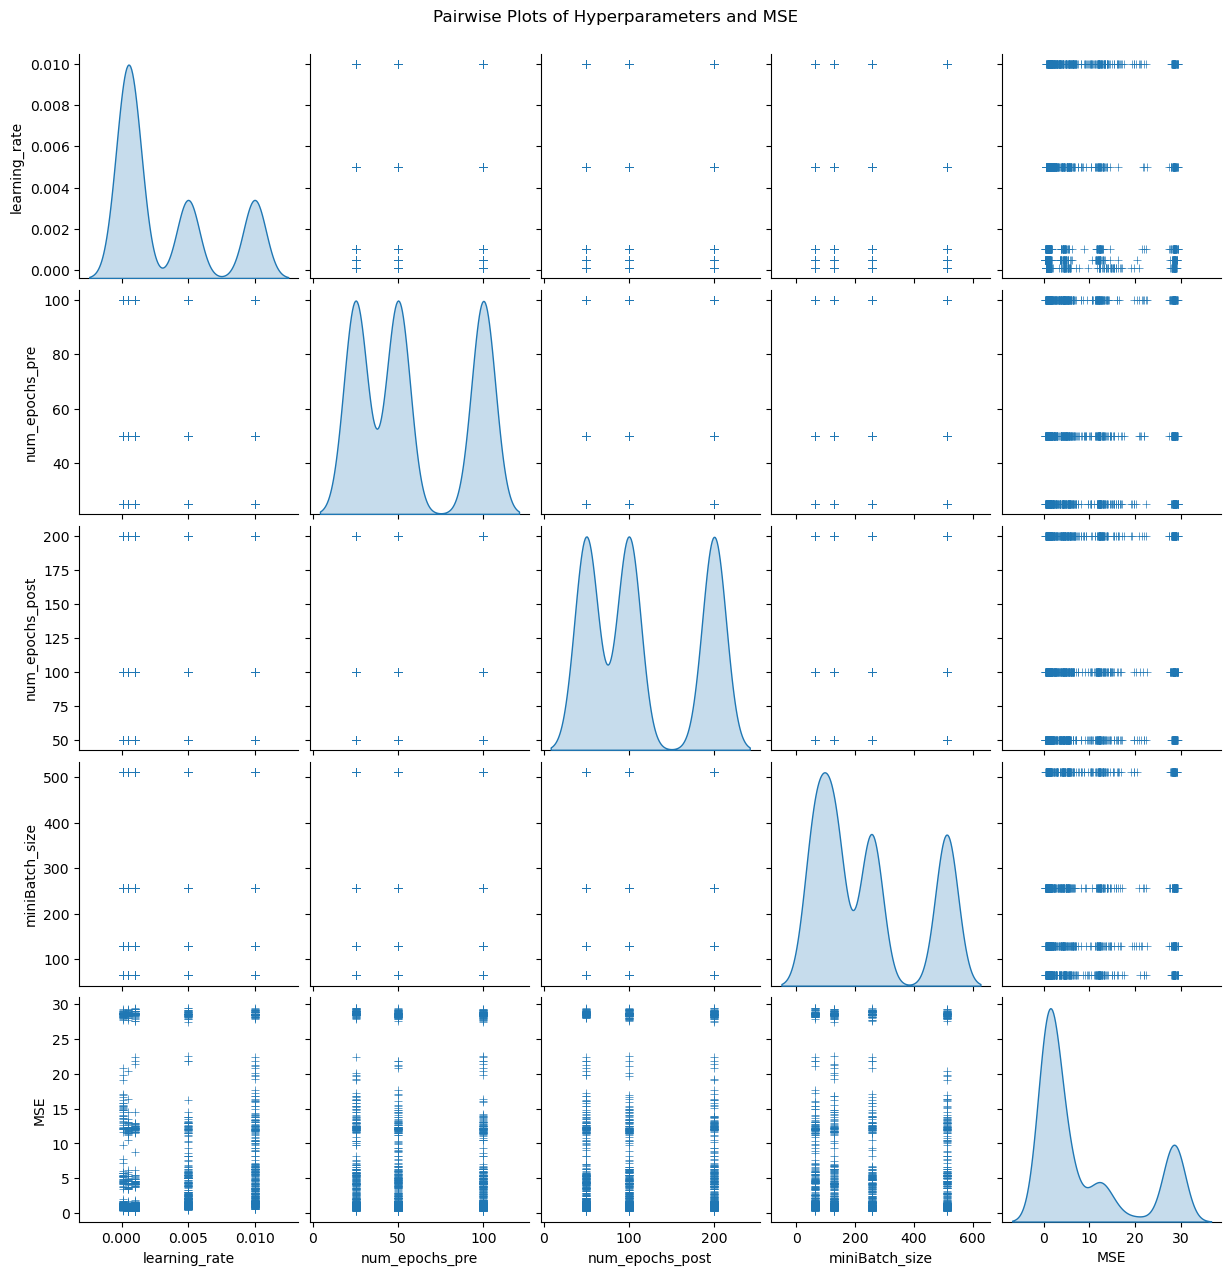

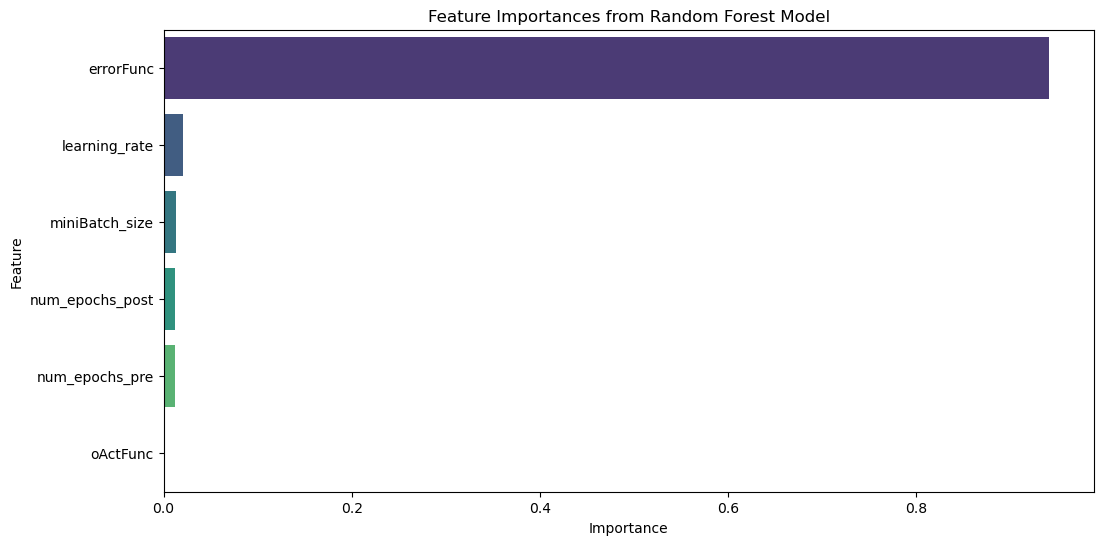

In [13]:
# Pairwise plot to explore interactions between hyperparameters
sns.pairplot(data[['learning_rate', 'num_epochs_pre', 'num_epochs_post', 'miniBatch_size', 'MSE']], diag_kind='kde', markers='+')
plt.suptitle('Pairwise Plots of Hyperparameters and MSE', y=1.02)
plt.show()

# Feature importance using a Random Forest model
from sklearn.ensemble import RandomForestRegressor

# Preparing the data
features = ['learning_rate', 'num_epochs_pre', 'num_epochs_post', 'miniBatch_size', 'oActFunc', 'errorFunc']
X = data[features]
y = data['MSE']

# Fitting the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extracting feature importances
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
